![screenshot](https://devblogs.nvidia.com/wp-content/uploads/2017/04/figure5-mnist-gan-graph.png)

### classification

mnist labelling
- 0~9
- mnist one-hot encoding
 1. 1 or 0
 2. noise: 1 or 0

discriminator
- mnist one-hot encoding 1 or 0
- images

https://blogs.nvidia.co.kr/2019/03/27/gaugan-photorealistic-landscapes-nvidia-research/

사용자들은 GauGAN으로 분할 지도를 그리고 장면을 조정해 모래, 하늘, 바다, 눈 등으로 영역별 라벨링을 할 수 있습니다.

수백만 개 이미지로 트레이닝된 이 딥 러닝 모델은 뛰어난 결과물로 장면을 연출해 냅니다. 연못을 그리고, 그 주변을 둘러싼 나무와 바위 등이 물에 비친 모습도 나타나죠. 영역 라벨을 “잔디”에서 “눈”으로 바꾸면 전체 이미지는 한 겨울로 변신합니다. 잎이 무성한 나무도 앙상한 가지만 남은 나무가 되죠.

브라이언 카탄자로 부사장은 “나무가 있는 곳, 해가 있는 곳, 하늘이 있는 곳 등을 표시하는 색칠하기 책과 같습니다. 그 작업이 끝나면 뉴럴 네트워크가 실제 이미지에서 학습한 내용을 바탕으로 모든 세부 사항과 질감, 반사, 그림자, 색상 등을 속속 채웁니다”라고 말했습니다.

GAN은 실제 세계에 대한 부족한 이해에도 불구하고 생성자(generator)와 감별자(discriminator)로 이뤄진 네트워크 쌍 구조 덕분에 설득력 있는 결과물을 만들어 낼 수 있습니다. 생성자가 이미지를 만들어 감별자에게 제시하면, 실제 이미지로 트레이닝된 감별자는 합성 이미지의 사실감을 향상시키는 방법에 대한 픽셀별 피드백으로 생성자를 지도합니다.


__실제 이미지에 대한 트레이닝을 거친 감별자는 실제로 연못이 어떻게 생겼는지 알며, 호수 표면에는 사물이 반사돼 표현된다는 점도 압니다. 생성자는 감별자로부터 설득력 있는 모방을 만들어 내는 법을 배우죠.__

cnn mnist with noise classification

copied and edited from: https://pinkwink.kr/1121

In [1]:
# cnn - mnist classification

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
TensorFlow version :  2.2.0-rc3
Keras version :  2.3.1


Using TensorFlow backend.


In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

In [0]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.1900 - accuracy: 0.9411 - val_loss: 0.0456 - val_accuracy: 0.9848
Epoch 2/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 3/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 4/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0258 - val_accuracy: 0.9909
Epoch 5/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0233 - val_accuracy: 0.9920
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0254 - val_accuracy: 0.9921
Epoch 7/12
60000/60000 [==============================] - 4s 63us/s

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02181238218268809
Test accuracy: 0.9933000206947327


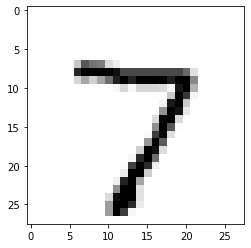

The Answer is  [7]


In [10]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

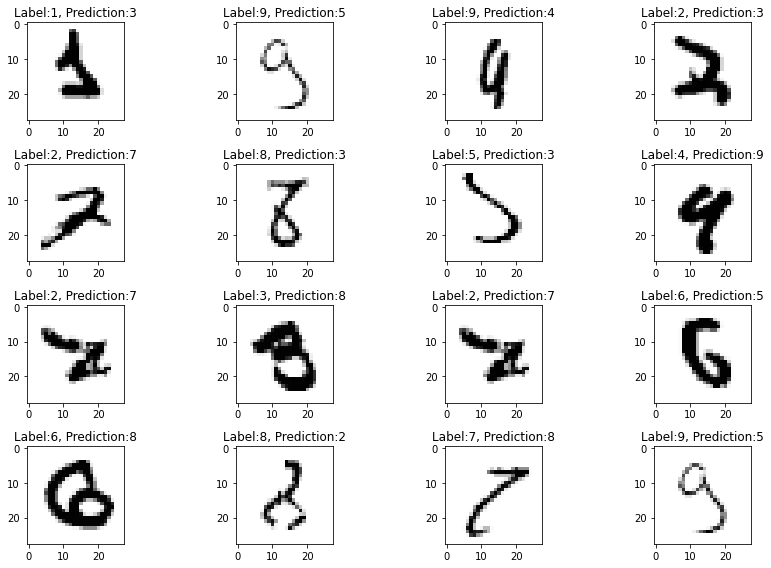

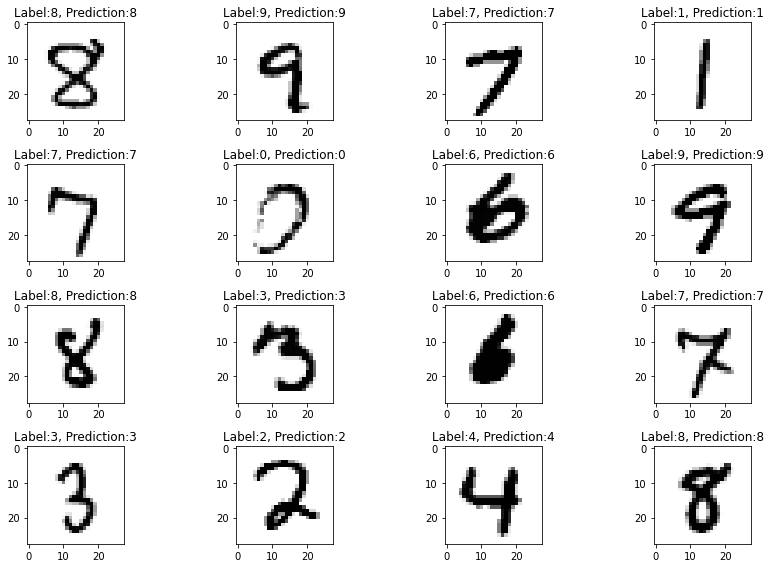

In [11]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []
right_result = []

for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)
  else:
    right_result.append(n)

samples = random.choices(population=wrong_result, k=16)
answers = random.choices(population=right_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()
print('     =======================================================================================================')

plt.figure(figsize=(12,8))
count = 0
for n in answers:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

In [0]:
# from keras.datasets import mnist
# import numpy as np

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train_noisy, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test_noisy, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 71us/step - loss: 0.0271 - accuracy: 0.9901 - val_loss: 0.0164 - val_accuracy: 0.9943
Epoch 2/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0170 - accuracy: 0.9940 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 3/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0155 - val_accuracy: 0.9945
Epoch 4/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0155 - val_accuracy: 0.9948
Epoch 5/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.0152 - val_accuracy: 0.9949
Epoch 6/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.0181 - val_accuracy: 0.9943
Epoch 7/12
60000/60000 [==============================] - 4s 66us/st

In [14]:
score = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018974367036784973
Test accuracy: 0.994949221611023


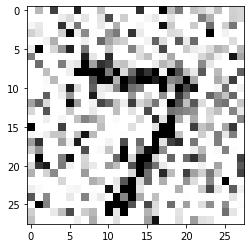

The Answer is  [7]


In [15]:
n = 0
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test_noisy[n].reshape((1, 28, 28, 1))))

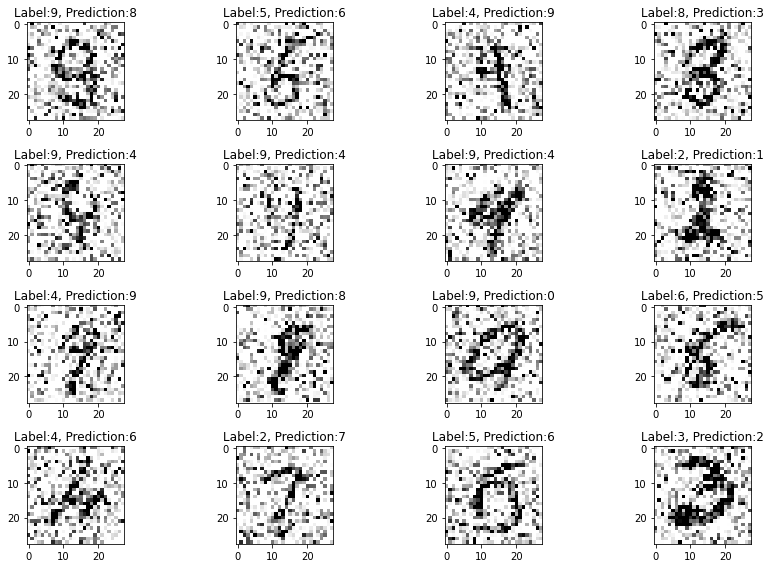

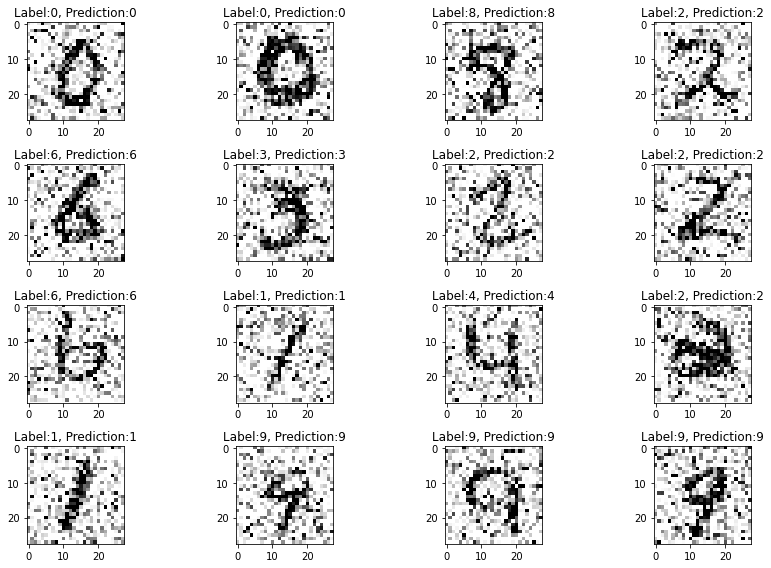

In [16]:
import random

predicted_result = model.predict(x_test_noisy)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []
right_result = []

for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:
    wrong_result.append(n)
  else:
    right_result.append(n)

samples = random.choices(population=wrong_result, k=16)
answers = random.choices(population=right_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()
print('     =======================================================================================================')

plt.figure(figsize=(12,8))
count = 0
for n in answers:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

여기서 어떻게 gan이랑 연결짓지?

https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/

https://towardsdatascience.com/dcgans-deep-convolutional-generative-adversarial-networks-c7f392c2c8f8

https://dreamgonfly.github.io/2018/03/17/gan-explained.html

https://blog.naver.com/yl95yl/221607915471